<a href="https://colab.research.google.com/github/EMAT31530/ai-group-project-group-22/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import csv
import sys
import tensorflow as tf 
from tensorflow.keras import layers
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import regularizers
import os
import pandas as pd
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Dropout
from keras import Input, Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def loadImages(directory):
    all_images = []
    for img in os.listdir(directory):
        if img.endswith(".tif"):
          image = cv2.imread(directory + '/' + img)
          crop_image = image[32:64, 32:64]
          all_images.append(crop_image)
    return all_images

In [ ]:
# Paths to access images in subfolders small enough to load into colab
#samplePath = r"C:\Users\charlie\Documents\uni\year_3\IntroAI\histopathologic-cancer-detection\sample"
samplePath = r"/content/drive/MyDrive/sample" 
samplePath2 = r"/content/drive/MyDrive/sample2" 
samplePath3 = r"/content/drive/MyDrive/sample3"
samplePath4 = r"/content/drive/MyDrive/sample4" 
samplePath5 = r"/content/drive/MyDrive/sample5"
samplePath6 = r"/content/drive/MyDrive/sample6"
samplePath7 = r"/content/drive/MyDrive/sample7"
all_sample_paths = [samplePath, samplePath2,samplePath3, samplePath4, samplePath5, samplePath6, samplePath7]
all_images = []

# Loading each image from the subfolders
for i in all_sample_paths:
  images = loadImages(i)
  for ii in images:
    all_images.append(ii)

In [ ]:
samplePath = r"/content/drive/MyDrive/sample" 
samplePath2 = r"/content/drive/MyDrive/sample2" 
samplePath3 = r"/content/drive/MyDrive/sample3"
samplePath4 = r"/content/drive/MyDrive/sample4" 
samplePath5 = r"/content/drive/MyDrive/sample5"
samplePath6 = r"/content/drive/MyDrive/sample6"
samplePath7 = r"/content/drive/MyDrive/sample7"

all_SL_images = []
all_SL_Paths = [samplePath, samplePath2,samplePath3, samplePath4, samplePath5]
for i in all_SL_Paths:
  images = loadImages(i)
  for ii in images:
    all_SL_images.append(ii)

all_SL_stack = np.stack(all_SL_images).astype('uint8')
# Combined labels that match up with images
all_SL_labels = sample_labels1 + sample_labels2 + sample_labels3 + sample_labels4 +  sample_labels5

In [ ]:
# image processing and test, train split
X_SL = all_SL_stack.astype('float32') / 255.0 - 0.5
SLX_train,SLX_test, SLy_train, SLy_test = train_test_split(X_SL,all_SL_labels, test_size=0.2, random_state=42)

augmented_SL_images = data_augmentation(X_SL)
ASLX_train,ASLX_test, ASLy_train, ASLy_test = train_test_split(np.array(augmented_SL_images),all_SL_labels, test_size=0.2, random_state=42)

allSL_X_train = np.concatenate((SLX_train, ASLX_train))
allSL_y_train = np.concatenate((SLy_train, ASLy_train))
allSL_X_test = np.concatenate((SLX_test, ASLX_test))
allSL_y_test = np.concatenate((SLy_test, ASLy_test))


In [ ]:
all_images_stack = np.stack(all_images).astype('uint8')

In [ ]:
dummy_attributes = np.random.choice([0, 1], size=(24056,))
# can be used for autoencoder training as it is unsupervised

In [ ]:
# Due to changes in order of images when extracting the zip folder, some names are needed to be found iterativly 
def loadImageNames(directory):
    all_images_names = []
    for img in os.listdir(directory):
        if img.endswith(".tif"):
            img = img.replace('.tif','')
            all_images_names.append(img)

    return all_images_names

In [ ]:
all_images_names5 = loadImageNames(samplePath5)


In [ ]:
labels = []

#locating labels from csv file 

def id_finder(image_name):
    #labels_path = r'C:\Users\charlie\Documents\uni\year_3\IntroAI\histopathologic-cancer-detection\train_labels.csv'
    labels_path = r'/content/drive/MyDrive/train_labels.csv'
    csv_file = csv.reader(open(labels_path, "r"))
    found = True
    idx = []
    #loop through the csv list
    for row in csv_file:
        
        #if current rows 2nd value is equal to input, print that row
        if image_name == row[0]:
            idx = row[1]
            found == True

    if idx == []:
       idx = '0'
       found == False

    return idx, found

In [ ]:
labels = []
for i in all_images_names5:
    idx, found = id_finder(i)
    if found == False:
      print(i)

    labels.append(idx)

In [ ]:
print(len(labels))
ids_labels = labels

NameError: ignored

In [ ]:
labels = []
for i in ids_labels: 
    labels.append(i[1])

In [ ]:
print(sample5_labels)

['1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0',

In [ ]:
X = all_images_stack.astype('float32') / 255.0 - 0.5

def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,dummy_attributes, test_size=0.1, random_state=42)

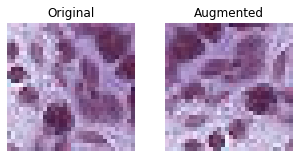

In [ ]:
# Plotting image augmentation
img1 = SLX_train[11]
augmentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),layers.experimental.preprocessing.RandomRotation(0.2)])
img2 = augmentation(img1)
images = [img1, img2]

fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
ii = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(np.clip(img1 + 0.5, 0, 1))
plt.title('Original')
plt.axis('off')
fig.add_subplot(rows, columns, 2)
plt.imshow(np.rot90(np.clip(img2 + 0.5, 0, 1)).tolist())
plt.title('Augmented')
plt.axis('off')
plt.show()

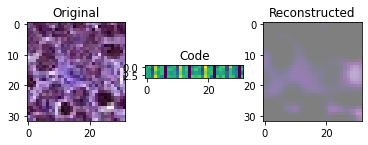

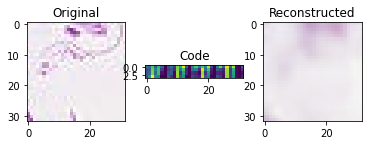

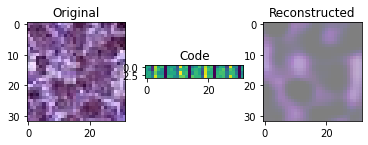

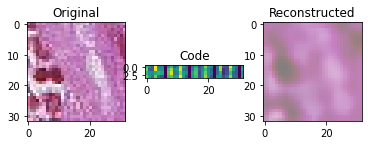

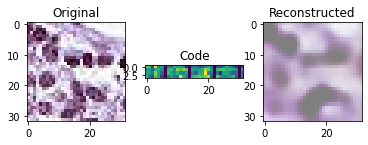

In [ ]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

def visualize(img,encoder,decoder):
    
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = SLX_train[2*i+16]
    visualize(img,encoderC,decoderC)

# REF plotting function: https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/
# 
# Author: Ali Abdelaal


In [ ]:
AX_train,AX_test, Ay_train, Ay_test = train_test_split(np.array(augmented_images),dummy_attributes, test_size=0.1, random_state=42)

In [ ]:
all_X_train = np.concatenate((X_train, AX_train))
all_y_train = np.concatenate((y_train, Ay_train))
all_X_test = np.concatenate((X_test, AX_test))
all_y_test = np.concatenate((y_test, Ay_test))
print(len(all_X_train))

43300


In [ ]:
#Basic AE
def basic_autoencoder(img_shape, code_size):

    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size,activation='relu'))
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape),activation='sigmoid'))
    decoder.add(Reshape(img_shape))
    # Split model into encoder and decoder 
    return encoder, decoder

In [ ]:
# define image size for encoder
x = X_SL.shape[1:]

In [ ]:
encoder, decoder = basic_autoencoder(x, 25)

inp = Input(x)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
opt = tf.keras.optimizers.Adam(0.001)
autoencoder.compile(optimizer=opt, loss='mse', metrics=['accuracy', tf.keras.metrics.AUC()])

print(autoencoder.summary())

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 sequential_33 (Sequential)  (None, 25)                76825     
                                                                 
 sequential_34 (Sequential)  (None, 32, 32, 3)         79872     
                                                                 
Total params: 156,697
Trainable params: 156,697
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_Basic = autoencoder.fit(x=allSL_X_train[:7000], y=allSL_X_train[:7000], epochs=25, validation_data=[allSL_X_test[:7000], allSL_X_test[:7000]])

Epoch 1/25
219/219 [==============================] - 19s 19ms/step - loss: 0.0534 - accuracy: 0.5247 - auc_3: 0.0000e+00 - val_loss: 0.0372 - val_accuracy: 0.5880 - val_auc_3: 0.0000e+00
Epoch 2/25
219/219 [==============================] - 5s 21ms/step - loss: 0.0405 - accuracy: 0.6351 - auc_3: 0.0000e+00 - val_loss: 0.0351 - val_accuracy: 0.7159 - val_auc_3: 0.0000e+00
Epoch 3/25
219/219 [==============================] - 4s 18ms/step - loss: 0.0386 - accuracy: 0.7396 - auc_3: 0.0000e+00 - val_loss: 0.0340 - val_accuracy: 0.7535 - val_auc_3: 0.0000e+00
Epoch 4/25
219/219 [==============================] - 4s 17ms/step - loss: 0.0377 - accuracy: 0.7474 - auc_3: 0.0000e+00 - val_loss: 0.0335 - val_accuracy: 0.7554 - val_auc_3: 0.0000e+00
Epoch 5/25
219/219 [==============================] - 4s 17ms/step - loss: 0.0369 - accuracy: 0.7447 - auc_3: 0.0000e+00 - val_loss: 0.0327 - val_accuracy: 0.7507 - val_auc_3: 0.0000e+00
Epoch 6/25
219/219 [==============================] - 4s 17ms/st

In [ ]:
#save augementation history
augment_basic = history_Basic

In [ ]:
# Dense Codes Predictor
def findCodes(X):
    codes = []
    s = 1
    for i in X:
        code = encoder.predict(i[None])[0]
        #counter
        s = s+1
        print(s)
        codes.append(code)
    return codes
    
Basic_codes_train = findCodes(SLX_train)
Basic_codes_test = findCodes(SLX_test)

In [ ]:
# Dense AE

def build_autoencoderDen(img_shape, code_size):
    encoder = Sequential()
    encoder.add(Input(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(512, activation='relu'))
    encoder.add(BatchNormalization(axis=1, momentum=0.99,epsilon=0.001,))
    encoder.add(Dropout(0.1))
    encoder.add(Dense(256, activation='relu'))
    encoder.add(BatchNormalization(axis=1, momentum=0.99,epsilon=0.001,))
    encoder.add(Dropout(0.2))
    encoder.add(Dense(128, activation='relu'))
    encoder.add(Dense(code_size, activation='relu'))

    decoder = Sequential()
    decoder.add(Dense(128, activation='relu'))
    decoder.add(Dropout(0.1))
    decoder.add(Dense(256, activation='relu'))
    decoder.add(BatchNormalization(axis=1, momentum=0.99,epsilon=0.001,))
    decoder.add(Dropout(0.2))
    decoder.add(Dense(512, activation='relu'))
    decoder.add(BatchNormalization(axis=1, momentum=0.99,epsilon=0.001,))
    decoder.add(Dense(np.prod(img_shape),activation='sigmoid'))
    decoder.add(Reshape(img_shape))


    return encoder, decoder

In [ ]:
encoderDen, decoderDen = build_autoencoderDen(x, 25)

inp = Input(x)
code = encoderDen(inp)
reconstruction = decoderDen(code)

autoencoderDen = Model(inp,reconstruction)
opt = tf.keras.optimizers.Adam(0.001)
autoencoderDen.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

print(autoencoderDen.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 25)                1743897   
                                                                 
 sequential_3 (Sequential)   (None, 32, 32, 3)         1746944   
                                                                 
Total params: 3,490,841
Trainable params: 3,487,769
Non-trainable params: 3,072
_________________________________________________________________
None


In [ ]:
history_Dense = autoencoderDen.fit(x=all_X_train, y=all_X_train, epochs=25, validation_data=[all_X_test, all_X_test])

Epoch 1/25
1354/1354 [==============================] - 69s 49ms/step - loss: 0.0417 - accuracy: 0.6899 - auc: 0.0000e+00 - val_loss: 0.0327 - val_accuracy: 0.7381 - val_auc: 0.0000e+00
Epoch 2/25
1354/1354 [==============================] - 64s 47ms/step - loss: 0.0333 - accuracy: 0.7304 - auc: 0.0000e+00 - val_loss: 0.0321 - val_accuracy: 0.7449 - val_auc: 0.0000e+00
Epoch 3/25
1354/1354 [==============================] - 63s 47ms/step - loss: 0.0329 - accuracy: 0.7346 - auc: 0.0000e+00 - val_loss: 0.0323 - val_accuracy: 0.7461 - val_auc: 0.0000e+00
Epoch 4/25
1354/1354 [==============================] - 63s 47ms/step - loss: 0.0324 - accuracy: 0.7377 - auc: 0.0000e+00 - val_loss: 0.0318 - val_accuracy: 0.7424 - val_auc: 0.0000e+00
Epoch 5/25
1354/1354 [==============================] - 64s 47ms/step - loss: 0.0322 - accuracy: 0.7414 - auc: 0.0000e+00 - val_loss: 0.0316 - val_accuracy: 0.7589 - val_auc: 0.0000e+00
Epoch 6/25
1354/1354 [==============================] - 64s 47ms/step 

In [ ]:
# Dense Codes Predictor
def findCodes(X):
    codes = []
    s = 1
    for i in X:
        code = encoderDen.predict(i[None])[0]
        s = s+1
        print(s)
        codes.append(code)
    return codes
    
Den_codes_train = findCodes(SLX_train)
Den_codes_test = findCodes(SLX_test)


In [ ]:
# Dense Codes Predictor
def findCodes(X):
    codes = []
    s = 1
    for i in X:
        code = encoderS.predict(i[None])[0]
        s = s+1
        print(s)
        codes.append(code)
    return codes
    
Sparse_codes_train = findCodes(SLX_train)
Sparse_codes_test = findCodes(SLX_test)

np.save(r'/content/drive/MyDrive/SparseTrain',Sparse_codes_train)
np.save(r'/content/drive/MyDrive/SparseTest',Sparse_codes_test)

In [ ]:

np.save(r'/content/drive/MyDrive/DenseTrain',Den_codes_train)
np.save(r'/content/drive/MyDrive/DenseTest',Den_codes_test)

In [ ]:
np.save(r'/content/drive/MyDrive/BasicTrain',Basic_codes_train)
np.save(r'/content/drive/MyDrive/BasicTest',Basic_codes_test)

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Dropout
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 

def build_autoencoder_Conv(img_shape, code_size):

  # The encoder
  encoder = Sequential()
  encoder.add(Conv2D(32, 3, activation= 'relu', padding='same', input_shape = (32,32,3)))
  encoder.add(MaxPooling2D(2, padding= 'same'))
  encoder.add(Conv2D(16, 3, activation= 'relu', padding='same'))
  encoder.add(Conv2D(16, 3, activation= 'relu', padding='same'))
  encoder.add(Conv2D(16, 3, activation= 'relu', padding='same'))
  #encoder.add(BatchNormalization(axis=1, momentum=0.99,epsilon=0.001,))
  #encoder.add(Dropout(0.25))
  encoder.add(MaxPooling2D(2, padding= 'same')) 
  encoder.add(Conv2D(8, 3, activation= 'relu', padding='same'))
  encoder.add(MaxPooling2D(2, padding= 'same')) 

  # The decoder
  decoder = Sequential()
  decoder.add(Conv2D(8, 3, activation= 'relu', padding='same'))
  decoder.add(UpSampling2D(2))
  #decoder.add(Conv2D(16, 3, activation= 'relu', padding='same'))
  #decoder.add(Conv2D(16, 3, activation= 'relu', padding='same'))
  decoder.add(Conv2D(16, 3, activation= 'relu', padding='same'))
  #decoder.add(BatchNormalization(axis=1, momentum=0.99,epsilon=0.001,))
  #decoder.add(Dropout(0.25))
  decoder.add(UpSampling2D(2))
  decoder.add(Conv2D(32, 3, activation= 'relu', padding='same'))
  #decoder.add(Conv2D(32, 3, activation= 'relu', padding='same'))
  #decoder.add(Conv2D(32, 3, activation= 'relu', padding='same'))
  decoder.add(UpSampling2D(2))
  decoder.add(Conv2D(3,3,activation='sigmoid', padding= 'same')) 
  decoder.add(Reshape(img_shape))

  return encoder, decoder


In [ ]:
encoderC, decoderC = build_autoencoder_Conv(x, 20)

inp = Input(x)
code = encoderC(inp)
reconstruction = decoderC(code)

autoencoderC = Model(inp,reconstruction)
opt = tf.keras.optimizers.Adam(0.001)
autoencoderC.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

print(autoencoderC.summary())

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 sequential_29 (Sequential)  (None, 4, 4, 8)           29816     
                                                                 
 sequential_30 (Sequential)  (None, 32, 32, 3)         30395     
                                                                 
Total params: 60,211
Trainable params: 60,211
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_Dense = autoencoderC.fit(x=allSL_X_train, y=allSL_X_train, epochs=5, validation_data=[allSL_X_test, allSL_X_test])

Epoch 1/5
623/623 [==============================] - 256s 407ms/step - loss: 0.0841 - accuracy: 0.3979 - val_loss: 0.0843 - val_accuracy: 0.3959
Epoch 2/5
623/623 [==============================] - 250s 401ms/step - loss: 0.0831 - accuracy: 0.3976 - val_loss: 0.0843 - val_accuracy: 0.3959
Epoch 3/5
623/623 [==============================] - 254s 407ms/step - loss: 0.0831 - accuracy: 0.3976 - val_loss: 0.0843 - val_accuracy: 0.3959
Epoch 4/5
623/623 [==============================] - 252s 405ms/step - loss: 0.0831 - accuracy: 0.3976 - val_loss: 0.0843 - val_accuracy: 0.3959
Epoch 5/5
117/623 [====>.........................] - ETA: 3:14 - loss: 0.0833 - accuracy: 0.3982

KeyboardInterrupt: ignored

In [ ]:
# Dense Codes Predictor
def findCodes(X):
    codes = []
    s = 1
    for i in X:
        code = encoderC.predict(i[None])[0]
        s = s+1
        print(s)
        codes.append(code)
    return codes
    
Conv_codes_train = findCodes(SLX_train)
Conv_codes_test = findCodes(SLX_test)

np.save(r'/content/drive/MyDrive/ConvTrain',Conv_codes_train)
np.save(r'/content/drive/MyDrive/ConvTest',Conv_codes_test)

In [ ]:
# Sparse Autoencoder
def build_autoencoder_S(img_shape, code_size):

      # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(128,activation='relu',activity_regularizer=regularizers.l1(10e-5)))
    encoder.add(BatchNormalization(axis=1, momentum=0.99,epsilon=0.001,))
    encoder.add(Dropout(0.25))
    encoder.add(Dense(code_size,activation='relu',activity_regularizer=regularizers.l1(10e-5)))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape),activation='sigmoid'))
    decoder.add(Reshape(img_shape))

    return encoder, decoder


In [ ]:
encoderS, decoderS = build_autoencoder_S(x, 20)

inp = Input(x)
code = encoderS(inp)
reconstruction = decoderS(code)

autoencoderS = Model(inp,reconstruction)
opt = tf.keras.optimizers.Adam(0.0001)
autoencoderS.compile(optimizer=opt, loss='mse', metrics=['accuracy', tf.keras.metrics.AUC()])

print(autoencoderS.summary())

NameError: ignored

In [ ]:
history_Sparse = autoencoderS.fit(all_X_train, all_X_train,
                 epochs=25,
                 batch_size=128,
                 validation_data=(all_X_test, all_X_test)) 

Epoch 1/25
339/339 [==============================] - 17s 39ms/step - loss: 0.0505 - accuracy: 0.6406 - auc_1: 0.0000e+00 - val_loss: 0.0389 - val_accuracy: 0.7370 - val_auc_1: 0.0000e+00
Epoch 2/25
339/339 [==============================] - 13s 37ms/step - loss: 0.0379 - accuracy: 0.7562 - auc_1: 0.0000e+00 - val_loss: 0.0425 - val_accuracy: 0.7475 - val_auc_1: 0.0000e+00
Epoch 3/25
339/339 [==============================] - 13s 37ms/step - loss: 0.0363 - accuracy: 0.7645 - auc_1: 0.0000e+00 - val_loss: 0.0364 - val_accuracy: 0.7562 - val_auc_1: 0.0000e+00
Epoch 4/25
339/339 [==============================] - 13s 37ms/step - loss: 0.0355 - accuracy: 0.7621 - auc_1: 0.0000e+00 - val_loss: 0.0354 - val_accuracy: 0.7604 - val_auc_1: 0.0000e+00
Epoch 5/25
339/339 [==============================] - 13s 38ms/step - loss: 0.0350 - accuracy: 0.7604 - auc_1: 0.0000e+00 - val_loss: 0.0352 - val_accuracy: 0.7506 - val_auc_1: 0.0000e+00
Epoch 6/25
339/339 [==============================] - 13s 38

In [ ]:
history_S256 = autoencoderS.fit(X_train, X_train,
                 epochs= 40,
                 batch_size=256,
                 validation_data=(X_test, X_test)) 

Epoch 1/40
85/85 [==============================] - 3s 18ms/step - loss: 0.0847 - accuracy: 0.4636 - auc_3: 0.0000e+00 - val_loss: 0.0531 - val_accuracy: 0.5536 - val_auc_3: 0.0000e+00
Epoch 2/40
85/85 [==============================] - 1s 9ms/step - loss: 0.0497 - accuracy: 0.5362 - auc_3: 0.0000e+00 - val_loss: 0.0475 - val_accuracy: 0.5501 - val_auc_3: 0.0000e+00
Epoch 3/40
85/85 [==============================] - 1s 9ms/step - loss: 0.0457 - accuracy: 0.5619 - auc_3: 0.0000e+00 - val_loss: 0.0446 - val_accuracy: 0.5799 - val_auc_3: 0.0000e+00
Epoch 4/40
85/85 [==============================] - 1s 9ms/step - loss: 0.0435 - accuracy: 0.5888 - auc_3: 0.0000e+00 - val_loss: 0.0432 - val_accuracy: 0.6322 - val_auc_3: 0.0000e+00
Epoch 5/40
85/85 [==============================] - 1s 9ms/step - loss: 0.0424 - accuracy: 0.6787 - auc_3: 0.0000e+00 - val_loss: 0.0423 - val_accuracy: 0.7298 - val_auc_3: 0.0000e+00
Epoch 6/40
85/85 [==============================] - 1s 9ms/step - loss: 0.0412 

In [ ]:
def findCodes(X):
    codes = []
    for i in X:
        code = encoder.predict(i[None])[0]
        codes.append(code)
    return codes
    
codes_train = findCodes(X_train)
codes_test = findCodes(X_test)

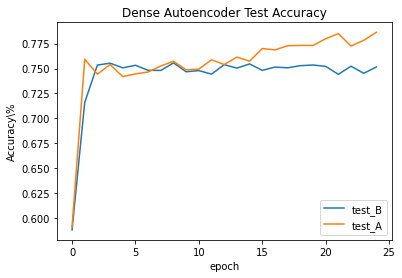

In [ ]:

#plt.plot(history_Basic.history['accuracy'])
plt.plot(history_Basic.history['val_accuracy'])
#plt.plot(augment_basic.history['accuracy'])
plt.plot(history_Aug)
plt.title('Dense Autoencoder Test Accuracy')
plt.ylabel('Accuracy\%')
plt.xlabel('epoch')
plt.legend(['test_B', 'test_A',], loc='lower right')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
Den_train_save = Den_codes_train
Den_test_save = Den_codes_test
SLy_train, SLy_test

In [ ]:
#Saving data features as secondary varibles 
y_train = SLy_train
y_test = SLy_test
codes_train = Conv_codes_train
codes_test = Conv_codes_test

In [ ]:
y_train = SLy_train
y_test = SLy_test
codes_train = Basic_codes_train
codes_test = Basic_codes_test

In [ ]:
codes_train_array = np.array(Conv_codes_train)
codes_test_array = np.array(Conv_codes_test)
print(codes_test_array.shape)
codes_train = codes_train_array.reshape(9964,128)
codes_test = codes_test_array.reshape(2492,128)

(2492, 4, 4, 8)


Accuracy of LDA classifier on training set: 0.72
Accuracy of LDA classifier on test set: 0.71


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy of QDA classifier on training set: 0.59
Accuracy of QDA classifier on test set: 0.57
[[1188  258]
 [ 471  575]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      1446
           1       0.69      0.55      0.61      1046

    accuracy                           0.71      2492
   macro avg       0.70      0.69      0.69      2492
weighted avg       0.71      0.71      0.70      2492

[[626 820]
 [246 800]]
              precision    recall  f1-score   support

           0       0.72      0.43      0.54      1446
           1       0.49      0.76      0.60      1046

    accuracy                           0.57      2492
   macro avg       0.61      0.60      0.57      2492
weighted avg       0.62      0.57      0.57      2492



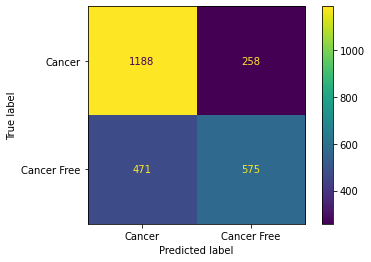

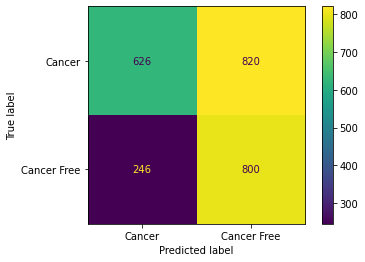

In [ ]:
# Linear and Quadratic Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(codes_train, SLy_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(codes_train, SLy_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(codes_test, SLy_test)))

qda = QuadraticDiscriminantAnalysis()
qda.fit(codes_train, SLy_train)
print('Accuracy of QDA classifier on training set: {:.2f}'
     .format(qda.score(codes_train, SLy_train)))
print('Accuracy of QDA classifier on test set: {:.2f}'
     .format(qda.score(codes_test, SLy_test)))

y_pred_lda = lda.predict(codes_test)
y_pred_qda = qda.predict(codes_test)

print(confusion_matrix(SLy_test, y_pred_lda))
print(classification_report(SLy_test, y_pred_lda))
print(confusion_matrix(SLy_test, y_pred_qda))
print(classification_report(SLy_test, y_pred_qda))

ConfusionMatrixDisplay.from_predictions(SLy_test, y_pred_lda, display_labels=['Cancer', 'Cancer Free'])
ConfusionMatrixDisplay.from_predictions(SLy_test, y_pred_qda, display_labels=['Cancer', 'Cancer Free'])

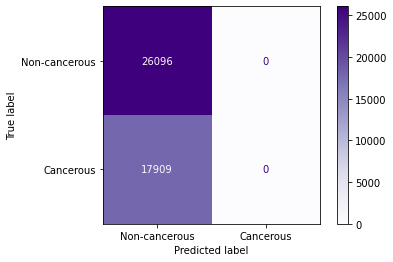

In [ ]:

ConfusionMatrixDisplay.from_predictions(test_labels, pred_labels, display_labels=['Non-cancerous', 'Cancerous'], cmap='Purples')


Accuracy of Decision Tree classifier on training set: 0.74
Accuracy of Decision Tree classifier on test set: 0.71
[[1045  401]
 [ 332  714]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1446
           1       0.64      0.68      0.66      1046

    accuracy                           0.71      2492
   macro avg       0.70      0.70      0.70      2492
weighted avg       0.71      0.71      0.71      2492



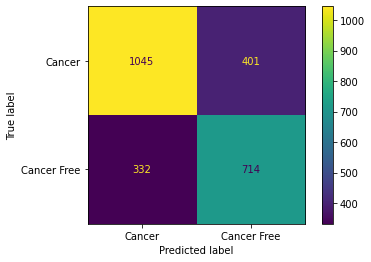

In [ ]:
# Decision Trees
decTree = DecisionTreeClassifier(max_depth=6).fit(codes_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(decTree.score(codes_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(decTree.score(codes_test, y_test)))

y_pred_tree = decTree.predict(codes_test)


print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, display_labels=['Cancer', 'Cancer Free'])

In [ ]:

# Search Space for parameters 
parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(codes_train, y_train)
gridsearch.best_params_

{'n_neighbors': 22, 'weights': 'uniform'}

Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.73
[[1049  397]
 [ 279  767]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1446
           1       0.66      0.73      0.69      1046

    accuracy                           0.73      2492
   macro avg       0.72      0.73      0.73      2492
weighted avg       0.73      0.73      0.73      2492



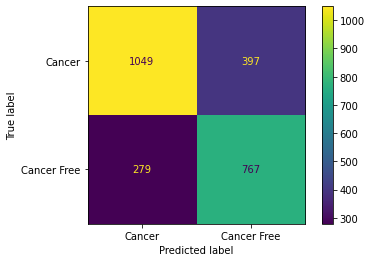

In [ ]:
# KNN Classifier -- see search for parameters for tuning 
knn = KNeighborsClassifier(n_neighbors=22, weights = 'uniform')
knn.fit(codes_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(codes_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(codes_test, y_test)))
y_pred = knn.predict(codes_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Cancer', 'Cancer Free'])

In [ ]:
#A function which returns the corresponding SVC model kernels
def getSVCParameters(i):
    if i == 0:
        # Polynomial 
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif i == 1:
        # Radial Basis Function 
        return SVC(kernel='rbf', gamma="auto")
    elif i == 2:
        # Sigmoid
        return SVC(kernel='sigmoid', gamma="auto")
    elif i == 3:
        # Linear
        return SVC(kernel='linear', gamma="auto")




In [ ]:
for i in range(4):
    svclassifier = getSVCParameters(i) 
    svclassifier.fit(codes_train, y_train)# Make prediction
    y_pred = svclassifier.predict(codes_test)
    print("Evaluation:", i, "kernel")
    print(classification_report(y_test,y_pred))

Accuracy of SVM classifier on training set: 0.79
Accuracy of SVM classifier on test set: 0.76
[[1205  241]
 [ 365  681]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1446
           1       0.74      0.65      0.69      1046

    accuracy                           0.76      2492
   macro avg       0.75      0.74      0.75      2492
weighted avg       0.76      0.76      0.75      2492



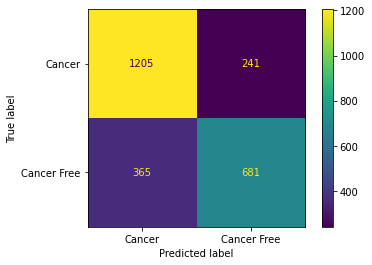

In [ ]:
from sklearn.svm import SVC

# SVC without tuning
svm = SVC()
svm.fit(codes_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(codes_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(codes_test, y_test)))
y_pred = svm.predict(codes_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Cancer','Cancer Free'])

Accuracy of SVM classifier on training set: 0.71
Accuracy of SVM classifier on test set: 0.71
[[1208  238]
 [ 476  570]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1446
           1       0.71      0.54      0.61      1046

    accuracy                           0.71      2492
   macro avg       0.71      0.69      0.69      2492
weighted avg       0.71      0.71      0.71      2492



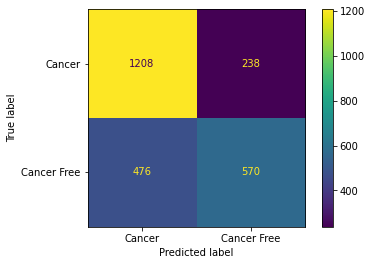

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(codes_train)
y = StandardScaler().fit_transform(codes_test)
from sklearn.decomposition import PCA
# PCA model 
pca = PCA(.95)
pca.fit(x)
train_img = pca.transform(x)
test_img = pca.transform(y)

logisticRegr = LogisticRegression()
logisticRegr.fit(train_img, y_train)

logisticRegr.score(test_img, y_test)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(logisticRegr.score(train_img, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(logisticRegr.score(test_img, y_test)))
y_pred = logisticRegr.predict(test_img)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Cancer','Cancer Free'])



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(codes_train, y_train)
predictions = rf.predict(codes_test)

print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(rf.score(codes_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(rf.score(codes_test, y_test)))
y_pred = rf.predict(codes_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Cancer','Cancer Free'])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


Accuracy of SVM classifier on training set: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


Accuracy of SVM classifier on test set: 0.30


ValueError: ignored

In [ ]:
print(y_pred)
y_pred_round = np.rint(y_pred).astype(int).astype(str)
print(y_pred_round)

[0.437 0.173 0.856 ... 0.575 0.305 0.189]
['0' '0' '1' ... '1' '0' '0']


[[1246  200]
 [ 405  641]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1446
           1       0.76      0.61      0.68      1046

    accuracy                           0.76      2492
   macro avg       0.76      0.74      0.74      2492
weighted avg       0.76      0.76      0.75      2492



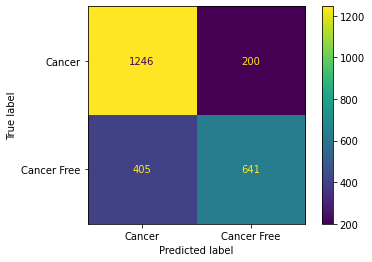

In [ ]:
print(confusion_matrix(y_test, y_pred_round))
print(classification_report(y_test, y_pred_round))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_round, display_labels=['Cancer','Cancer Free'])

In [ ]:
basic_codes_train = np.array(codes_train)
basic_codes_test = np.array(codes_test)

In [ ]:
# Now create CNN
def build_fit_eval_model(train_data, test_data, train_labels, test_labels):
    height = train_data.shape[1]
    width = train_data.shape[2]
    #channels = train_data.shape[3]
    num_classes = 1

    # build model here.
    model = Sequential()

    # model.add(
    #     Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(train_data.shape[1:])))
    # model.add(tf.keras.layers.BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # model.add(tf.keras.layers.Dropout(0.5))

    model.add(
        Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu', input_shape=(4,5,1)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.BatchNormalization())


    model.add(Conv2D(filters=64, kernel_size=(2, 2), padding='same',
                     activation='relu'))#, input_shape=(train_data.shape[1:])))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(Conv2D(filters=128, kernel_size=(2, 2), padding='same',
                     activation='relu'))#, input_shape=(train_data.shape[1:])))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(Conv2D(filters=256, kernel_size=(2, 2), padding='same',
                     activation='relu'))  # , input_shape=(train_data.shape[1:])))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    #model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #model.add(tf.keras.layers.BatchNormalization()) #Doesn't help
    opt = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model here
    model.fit(train_data, train_labels, epochs=10)

    # evaluate model on test set here
    results = model.evaluate(test_data, test_labels)
    print(results)
    return model

In [ ]:
codes_train_reshape = basic_codes_train.reshape(11210,4,5)
codes_test_reshape = basic_codes_test.reshape(1246,4,5)

In [ ]:
#Stored Sample Labels 
sample_labels1 = ['1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1']

sample_labels2 = ['1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0']

sample_labels3 = ['1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1']

sample_labels4 = ['0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1']

sample_labels5 = ['1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0']